## Visualize Data

#### 1.  Import Libs

In [1]:
# Matrix manipulations and Reading  modules for Quanergy M8
import pandas as pd
import numpy as np
import readIMUGPSQuanergyM8
import readQuanergyM8Lidar
import time

In [2]:
# Visualization
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.tools import make_subplots
init_notebook_mode(connected=True)

#### 2. Functions

In [3]:
def plotBox(df, rows, cols):
    fig = make_subplots(rows=rows, cols=cols)
    columns = df.columns

    if rows*cols != len(columns):
        print('Warning: (rows x cols) must be equal to the number of columns')
        return fig
    
    count = 1
    for i in range(1,rows+1):
        for j in range(1,cols+1):
            col = columns[count-1]
            y = [df[col].min()] +  df[col].quantile([0.25, 0.25]).values.tolist() \
                 + [df[col].median()] + df[col].quantile([0.75, 0.75]).values.tolist() + [df[col].max()]
            trace = go.Box(
                       name=col,
                       y=y
            )
            fig.append_trace(trace,i,j)
            count = count + 1  
    return fig

In [4]:
def isListOrdered(data):
    flag = 0
    i = 1
    while i < len(data): 
        if(data[i] < data[i - 1]): 
            flag += 1
        i += 1
    return flag

#### 3.  Load Data

In [ ]:
# Read IMU and GPS information
start = time.time()
fileNameInputIMUGPS = 'Data_samples/Data1_IMUGPS.OUT'
dfIMUGPS = readIMUGPSQuanergyM8.readIMUGPS(fileNameInputIMUGPS)
#dfIMUGPS.to_csv('Data_samples/Data1_IMUGPS.csv', index_label=False)
end = time.time()
print('Elpased time loading = %.3f min'%((end-start)/60.0))

In [ ]:
# Read Point Cloud
start = time.time()
fileNameInputLidar = 'Data_samples/Data1_Lidar.lid'
iniTime = 146579.355960762
endTime = 147296.954564425
dfLidar = readQuanergyM8Lidar.readLidarTimeIntervalDF(fileNameInputLidar, iniTime, endTime)
#dfLidar.to_csv('Data_samples/Data1_Lidar.csv', index_label=False)
end = time.time()
print('Elpased time loading = %.3f min'%((end-start)/60.0))

#### Read CSV for faster loading using read_csv

In [6]:
start = time.time()
dfIMUGPS = pd.read_csv('Data_samples/Data1_IMUGPS.csv')
end = time.time()
print('Elpased time loading = %.3f min'%((end-start)/60.0))

Elpased time loading = 0.027 min


In [7]:
dfIMUGPS.head()

,GPSTime(SoW),Latitude,Longitude,Altitude,X,Y,Z,Roll,Pitch,Heading,VelX,VelY,VelZ,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,WanderAngle
0,146205.0000,0.058953,-1.335809,1005.601562,329334.135763,373483.137681,1005.601562,0.016026,-0.034765,-0.550299,-0.000234,-0.001234,0.000188,-0.001279,-0.032843,0.004956,-0.001434,0.059471,-0.022297,0.0
1,146205.0047,0.058953,-1.335809,1005.601562,329334.135763,373483.137681,1005.601562,0.016031,-0.034765,-0.550297,-0.000388,-0.001228,0.000211,0.001408,-0.000026,-0.003653,0.002294,0.042063,-0.029740,0.0
2,146205.0097,0.058953,-1.335809,1005.601562,329334.135760,373483.137680,1005.601562,0.016035,-0.034765,-0.550296,-0.000388,-0.001235,0.000193,-0.006318,0.030872,0.000894,0.022180,0.009746,0.002595,0.0
3,146205.0147,0.058953,-1.335809,1005.601562,329334.135753,373483.137679,1005.601562,0.016036,-0.034763,-0.550299,-0.000234,-0.001204,0.000197,0.015507,-0.015461,0.012600,0.010995,0.020929,0.006313,0.0
4,146205.0197,0.058953,-1.335809,1005.601501,329334.135740,373483.137677,1005.601501,0.016037,-0.034763,-0.550304,-0.000312,-0.001282,0.000260,0.011807,0.008527,0.006749,0.012237,0.002275,-0.008585,0.0


In [8]:
start = time.time()
dfLidar= pd.read_csv('Data_samples/Data1_Lidar.csv')
end = time.time()
print('Elpased time loading = %.3f min'%((end-start)/60.0))

Elpased time loading = 1.544 min


In [9]:
dfLidar.head()

,PacketTime(SoW),Block,Azimuth,Channel,Return,Distance,Intensity,X,Y,Z
0,146579.39871,2,87.680769,7,1,5.50075,18,0.306296,5.483642,0.306773
1,146579.39871,2,87.680769,7,2,4.30367,16,0.239639,4.290285,0.240013
2,146579.39871,3,87.750000,7,1,5.69073,19,0.316874,5.673031,0.317368
3,146579.39871,3,87.750000,7,2,4.28545,17,0.238625,4.272121,0.238997
4,146579.39871,4,87.819231,7,1,5.87289,21,0.327017,5.854624,0.327527


#### 4. Statistical Description

In [10]:
# Number of registers
print('1. Total registers IMU/GPS: %d' % len(dfIMUGPS))
print('2. Total registers Point Cloud: %d' % len(dfLidar))

1. Total registers IMU/GPS: 286627
2. Total registers Point Cloud: 75101607


In [11]:
# Field types
print('1. IMU/GPS data:')
print(dfIMUGPS.dtypes)
print('')
print('2. Point Cloud data')
print(dfLidar.dtypes)

1. IMU/GPS data:
GPSTime(SoW)    float64
Latitude        float64
Longitude       float64
Altitude        float64
X               float64
Y               float64
Z               float64
Roll            float64
Pitch           float64
Heading         float64
VelX            float64
VelY            float64
VelZ            float64
AccX            float64
AccY            float64
AccZ            float64
GyroX           float64
GyroY           float64
GyroZ           float64
WanderAngle     float64
dtype: object

2. Point Cloud data
PacketTime(SoW)    float64
Block                int64
Azimuth            float64
Channel              int64
Return               int64
Distance           float64
Intensity            int64
X                  float64
Y                  float64
Z                  float64
dtype: object


In [12]:
# Null registers
print('1. IMU/GPS data:')
print(dfIMUGPS.isna().sum())
print('')
print('2. Point Cloud data')
print(dfLidar.isna().sum())

1. IMU/GPS data:
GPSTime(SoW)    0
Latitude        0
Longitude       0
Altitude        0
X               0
Y               0
Z               0
Roll            0
Pitch           0
Heading         0
VelX            0
VelY            0
VelZ            0
AccX            0
AccY            0
AccZ            0
GyroX           0
GyroY           0
GyroZ           0
WanderAngle     0
dtype: int64

2. Point Cloud data
PacketTime(SoW)    0
Block              0
Azimuth            0
Channel            0
Return             0
Distance           0
Intensity          0
X                  0
Y                  0
Z                  0
dtype: int64


In [13]:
# Describe IMU/GPS
desc = dfIMUGPS.describe() 
desc 

,GPSTime(SoW),Latitude,Longitude,Altitude,X,Y,Z,Roll,Pitch,Heading,VelX,VelY,VelZ,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,WanderAngle
count,286627.000000,286627.000000,286627.000000,286627.000000,286627.000000,286627.000000,286627.000000,286627.000000,286627.000000,286627.000000,286627.000000,286627.000000,286627.000000,286627.000000,286627.000000,286627.000000,286627.000000,286627.000000,286627.000000,286627.0
mean,146918.002189,0.058963,-1.335813,1025.999361,329304.286912,373548.177824,1025.999361,0.006019,-0.062773,-0.177037,-0.003399,-0.002808,0.000039,0.000262,-0.000031,-0.000446,0.773726,0.017304,0.259200,0.0
std,411.652897,0.000016,0.000008,28.297701,48.798721,99.500770,28.297701,0.075837,0.120812,1.492417,3.111146,2.851582,0.488894,0.943331,0.992153,0.978671,7.905084,6.207954,13.915379,0.0
min,146205.000000,0.058952,-1.335832,1005.558411,329183.277520,373474.976169,1005.558411,-0.417787,-0.506326,-3.141581,-10.621682,-10.454725,-2.417742,-6.038828,-6.836752,-8.457238,-90.525497,-60.056992,-96.802917,0.0
25%,146561.502200,0.058953,-1.335816,1005.578308,329285.270333,373481.842244,1005.578308,0.000766,-0.079252,-0.733555,-0.031747,-0.058488,-0.014451,-0.052272,-0.062852,-0.064048,-0.127694,-0.326827,-0.130909,0.0
50%,146918.000000,0.058953,-1.335809,1005.878235,329334.127965,373483.136133,1005.878235,0.013878,-0.037238,-0.552190,-0.000049,-0.000220,-0.000127,0.000583,-0.000601,-0.000415,0.006319,0.000854,0.000946,0.0
75%,147274.502200,0.058978,-1.335809,1044.782288,329334.928765,373642.774603,1044.782288,0.016101,-0.034945,0.032503,0.003906,0.002055,0.003298,0.064905,0.062202,0.034303,1.393691,0.370151,0.234013,0.0
max,147631.000000,0.058998,-1.335808,1084.544678,329339.517439,373767.231980,1084.544678,0.459880,0.387753,3.141528,10.648499,10.641378,3.412244,6.307240,9.524222,12.580401,193.395386,62.035950,93.075813,0.0


In [14]:
fig = plotBox(dfIMUGPS, rows=5, cols=4)
iplot(fig, filename='Box')

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]    [ (1,4) x4,y4 ]  
[ (2,1) x5,y5 ]    [ (2,2) x6,y6 ]    [ (2,3) x7,y7 ]    [ (2,4) x8,y8 ]  
[ (3,1) x9,y9 ]    [ (3,2) x10,y10 ]  [ (3,3) x11,y11 ]  [ (3,4) x12,y12 ]
[ (4,1) x13,y13 ]  [ (4,2) x14,y14 ]  [ (4,3) x15,y15 ]  [ (4,4) x16,y16 ]
[ (5,1) x17,y17 ]  [ (5,2) x18,y18 ]  [ (5,3) x19,y19 ]  [ (5,4) x20,y20 ]



In [15]:
# Describe Point Cloud
desc = dfLidar.describe() 
desc 

,PacketTime(SoW),Block,Azimuth,Channel,Return,Distance,Intensity,X,Y,Z
count,7.510161e+07,7.510161e+07,7.510161e+07,7.510161e+07,7.510161e+07,7.510161e+07,7.510161e+07,7.510161e+07,7.510161e+07,7.510161e+07
mean,1.469508e+05,2.449979e+01,1.812713e+02,3.467824e+00,1.044755e+00,5.495427e+01,2.967171e+01,-7.266710e+00,5.319905e+01,-7.487345e+00
std,1.778523e+02,1.443054e+01,1.475987e+02,2.216249e+00,2.154594e-01,2.653110e+01,3.476502e+00,7.584862e+00,2.579573e+01,7.868689e+00
min,1.465794e+05,0.000000e+00,3.461538e-02,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-6.143538e+01,0.000000e+00,-6.468894e+01
25%,1.468000e+05,1.200000e+01,3.153462e+01,2.000000e+00,1.000000e+00,3.674169e+01,2.800000e+01,-1.196376e+01,3.546594e+01,-1.234421e+01
50%,1.469173e+05,2.400000e+01,2.631462e+02,4.000000e+00,1.000000e+00,5.256552e+01,3.000000e+01,-5.907291e+00,5.089779e+01,-5.991507e+00
75%,1.470999e+05,3.700000e+01,3.291923e+02,5.000000e+00,1.000000e+00,7.397031e+01,3.200000e+01,-1.044801e+00,7.157011e+01,-1.051946e+00
max,1.472970e+05,4.900000e+01,3.600000e+02,7.000000e+00,3.000000e+00,2.066961e+02,6.500000e+01,1.148682e+01,2.066961e+02,1.150473e+01


In [16]:
fig = plotBox(dfLidar, rows=2, cols=5)
iplot(fig, filename='Box')

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]    [ (1,4) x4,y4 ]    [ (1,5) x5,y5 ]  
[ (2,1) x6,y6 ]    [ (2,2) x7,y7 ]    [ (2,3) x8,y8 ]    [ (2,4) x9,y9 ]    [ (2,5) x10,y10 ]



#### 5. Time Analysis

In [17]:
TimeScaleIMUGPS = dfIMUGPS['GPSTime(SoW)'].values.tolist()
TimeScaleLidar = dfLidar['PacketTime(SoW)'].values.tolist()

In [18]:
## Is data ordered IMU/GPS
numberofdisorders = isListOrdered(TimeScaleIMUGPS)
if numberofdisorders == 0:
    print('Data is ordered.')
else:
    print('%d values in no order.'%(numberofdisorders))

Data is ordered.


In [19]:
## Is data ordered IMU/GPS
numberofdisorders = isListOrdered(TimeScaleLidar)
if numberofdisorders == 0:
    print('Data is ordered.')
else:
    print('%d values in no order.'%(numberofdisorders))

Data is ordered.


In [20]:
# Create a trace
trace1 = go.Scatter(
    name='Timestamps IMU/GPS',
    x = [TimeScaleIMUGPS[0], TimeScaleIMUGPS[-1]],
    y = [1]*2
)

trace2 = go.Scatter(
    name='Timestamps Lidar',
    x = [TimeScaleLidar[0], TimeScaleLidar[-1]],
    y = [2]*2
)

data = [trace1, trace2]

iplot(data, filename='basic-line')

In [21]:
## How many values of time scale IMU/GPS in time scale Lidar?
len(set(TimeScaleLidar).intersection(TimeScaleIMUGPS))

0

In [88]:
timeRelationMinMax = dict()
nonRepeatedTimeScaleLidar = sorted(list(set(TimeScaleLidar)))
i = 0
valLidar = nonRepeatedTimeScaleLidar[i]
totalTimeLidar = len(nonRepeatedTimeScaleLidar)
for j in range(1,len(TimeScaleIMUGPS)):
    if valLidar<TimeScaleIMUGPS[j] and valLidar>TimeScaleIMUGPS[j-1]:
        timeRelationMinMax[i] = [j-1,j]
        print('Inside')
        i+=1
        if i < totalTimeLidar:
            valLidar = nonRepeatedTimeScaleLidar[i]
        else:
            break
print(len(TimeScaleIMUGPS))
print(len(nonRepeatedTimeScaleLidar))
print(len(timeRelationMinMax))

Inside
286627
273645
1


In [93]:
initData = 150000
totalData = 20000

trace1 = go.Scatter(
              name='IMU/GPS',
              mode='markers',
              x = TimeScaleIMUGPS[initData:initData+totalData],
              y = [1]*len(TimeScaleIMUGPS[initData:initData+totalData])
)

trace2 = go.Scatter(
              name='Lidar',
              mode='markers',
              x = nonRepeatedTimeScaleLidar[initData:initData+totalData],
              y = [1.1]*len(nonRepeatedTimeScaleLidar[initData:initData+totalData])
)
data = [trace1, trace2]

iplot(data,filename='series')

In [94]:
dtIMUGPS = [TimeScaleIMUGPS[i+1] - TimeScaleIMUGPS[i] for i in range(len(TimeScaleIMUGPS)-1)]
dtLidar = [nonRepeatedTimeScaleLidar[i+1] - nonRepeatedTimeScaleLidar[i] for i in range(len(nonRepeatedTimeScaleLidar)-1)]

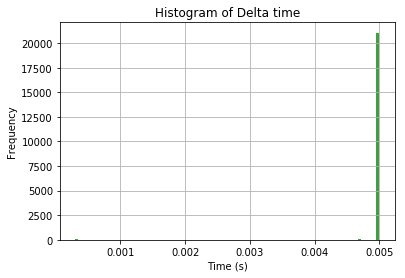

In [105]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = dtIMUGPS

# the histogram of the data
n, bins, patches = plt.hist(x, 100, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Time (s)')
plt.ylabel('Frequency')
plt.title('Histogram of Delta time')

plt.grid(True)
plt.show()

In [106]:
print(list(set(dtIMUGPS)))

[0.004700000019511208, 0.004999999975552782, 0.0003000000142492354, 0.005000000004656613, 0.005000000033760443]


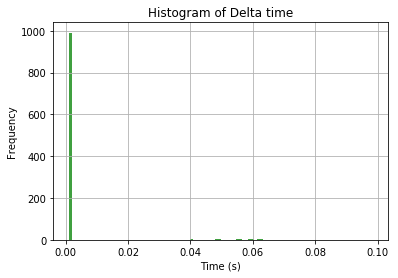

In [107]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = dtLidar

# the histogram of the data
n, bins, patches = plt.hist(x, 100, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Time (s)')
plt.ylabel('Frequency')
plt.title('Histogram of Delta time')

plt.grid(True)
plt.show()

In [108]:
print(list(set(dtLidar)))

[0.0009293380135204643, 0.0009293569892179221, 0.0009293369948863983, 0.0009293379844166338, 0.0009293390030506998, 0.0009293370239902288, 0.03996158600784838, 0.04832562600495294, 0.001858956995420158, 0.0009290569869335741, 0.03996156697394326, 0.04925492501934059, 0.0018586759979370981, 0.04089089800254442, 0.04925493698101491, 0.0018586749793030322, 0.048325682000722736, 0.05204302998026833, 0.061336466984357685, 0.054831136018037796, 0.046466920990496874, 0.047396291978657246, 0.054831061977893114, 0.056689654011279345, 0.057619174011051655, 0.0594776920042932, 0.0018586739897727966, 0.002788010984659195, 0.049254897981882095, 0.00185870096902363, 0.040890892007155344, 0.05390167699079029, 0.06319511399487965, 0.049255032994551584, 0.06319526300649159, 0.05483097300748341, 0.06412441001157276, 0.05297238097409718, 0.054831122019095346, 0.04367890799767338, 0.04182024300098419, 0.05483102798461914, 0.0641244649887085, 0.06598305702209473, 0.09758056700229645, 0.04089094698429108, 0